In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.misc import derivative
import scipy.optimize as  optimize
import scipy.integrate as integrate



## Варіант та костанти

In [2]:
n = 8          # Кількість PU у системі
k = 2          # Система виходить з ладу при відмові більше n - k PU
lambd = 0.0001 # Інтерсивність відмов

tau = 10_000   # Кількість годин, що пропрацювала система
m = 2 # Кіл-ть PU, що відмовили за час tau, завдання 1А
r = 1 # Кіл-ть PU, що відмовили за час tau, завдання 1В

M = 100 # зменшення ефективної інтенсивності відмов для завдання 1С

t = np.linspace(0, 60000, num=60000)

## Завдання 1A

In [3]:
P_pu = lambda t: np.exp(-lambd * t)   # функція надійності одного PU
Q_pu = lambda t: 1 - P_pu(t)          # функція ненадійності одного PU

# функція НЕнадійності для усієї системи
Q_cs = lambda t: np.sum([comb(n, i) * P_pu(t)**(n - i) * Q_pu(t)**(i) 
                         for i in range(n - k, n + 1)], axis=0)
# функція надійності для усієї системи
P_cs = lambda t: 1 - Q_cs(t)        

f_pu = lambda t: derivative(Q_pu, t) # функція щільності розподілу відмов одного PU
f_cs = lambda t: derivative(Q_cs, t) # функція щільності розподілу відмов системи

lambda_pu = lambda t: f_pu(t) / P_pu(t) # функція інтенсивності відмов PU
lambda_cs = lambda t: f_cs(t) / P_cs(t) # функція інтунсивності відмов системи

# надійність PU на інтервалі від tau до tau + t за умови безвідмовної роботи до tau
P_interval_pu = lambda t, tau: P_pu(t + tau) / P_pu(tau)
# надійність системи на інтервалі від tau до tau + t за умови безвідмовної роботи до tau
P_interval_cs = lambda t, tau: P_cs(t + tau) / P_cs(tau)

# НЕнадійність системі на інтервалі від tau до tau + t за умови відмови т PU
Q_interval_cs_m = lambda t, m: np.sum([comb(n - m, i) * P_pu(t)**(n - m - i) * Q_pu(t)**i
                                           for i in range(n - m - k, n - m + 1)], axis=0)
# надійність системі на інтервалі від tau до tau + t за умови відмови т PU
P_interval_cs_m = lambda t, m: 1 - Q_interval_cs_m(t, m)


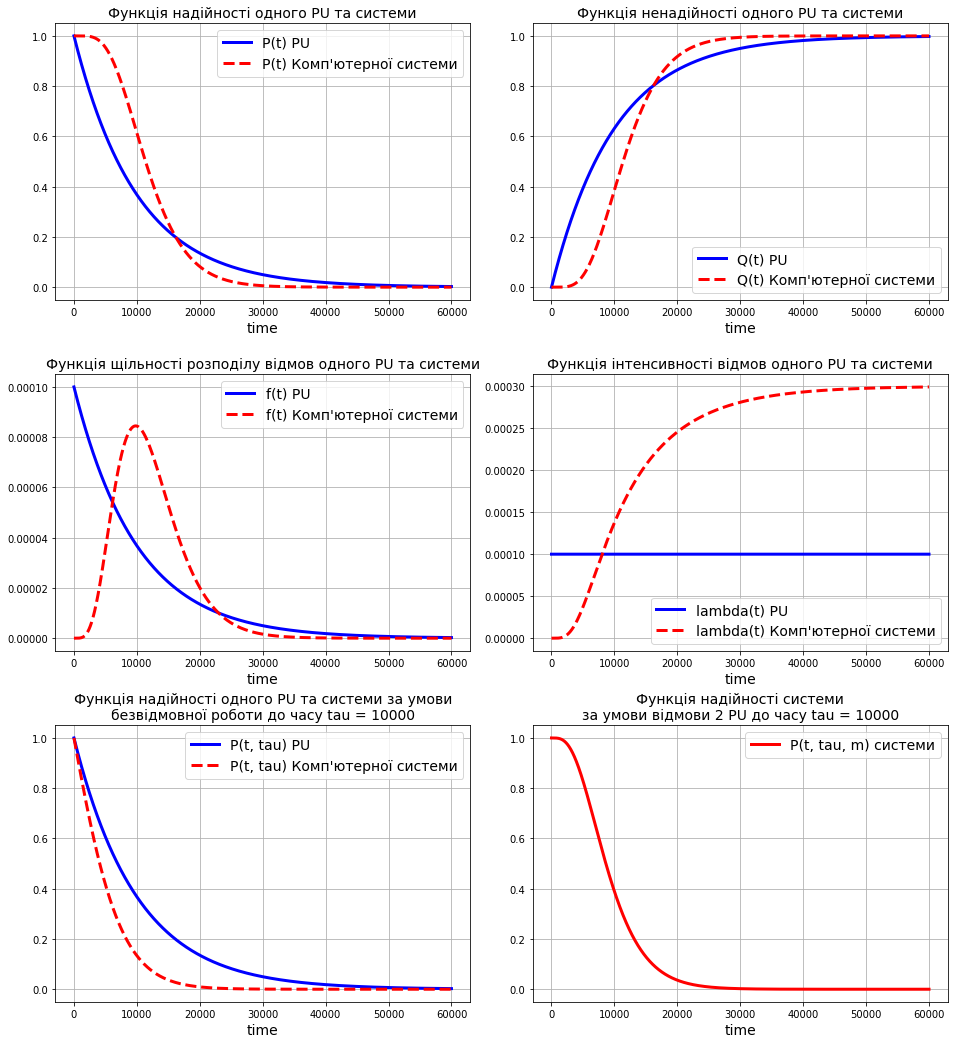

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

ax[0, 0].plot(t, P_pu(t), color="blue", linewidth=3, ls="-",label="P(t) PU")
ax[0, 0].plot(t, P_cs(t), color="red", linewidth=3, ls="--", label="P(t) Комп'ютерної системи")
ax[0, 0].set_title("Функція надійності одного PU та системи", fontsize=14)
ax[0, 0].set_xlabel("time", fontsize=14)
ax[0, 0].legend(fontsize=14, loc=0)
ax[0, 0].grid()

ax[0, 1].plot(t, Q_pu(t), color="blue", linewidth=3, ls="-",label="Q(t) PU")
ax[0, 1].plot(t, Q_cs(t), color="red", linewidth=3, ls="--", label="Q(t) Комп'ютерної системи" )
ax[0, 1].set_title("Функція ненадійності одного PU та системи", fontsize=14)
ax[0, 1].set_xlabel("time", fontsize=14)
ax[0, 1].legend(fontsize=14, loc=0)
ax[0, 1].grid()

ax[1, 0].plot(t, f_pu(t), color="blue", linewidth=3, ls="-",label="f(t) PU")
ax[1, 0].plot(t, f_cs(t), color="red", linewidth=3, ls="--", label="f(t) Комп'ютерної системи")
ax[1, 0].set_title("Функція щільності розподілу відмов одного PU та системи", fontsize=14)
ax[1, 0].set_xlabel("time", fontsize=14)
ax[1, 0].legend(fontsize=14, loc=0)
ax[1, 0].grid()

ax[1, 1].plot(t, lambda_pu(t), color="blue", linewidth=3, ls="-",label="lambda(t) PU")
ax[1, 1].plot(t, lambda_cs(t), color="red", linewidth=3, ls="--", label="lambda(t) Комп'ютерної системи")
ax[1, 1].set_title("Функція інтенсивності відмов одного PU та системи", fontsize=14)
ax[1, 1].set_xlabel("time", fontsize=14)
ax[1, 1].legend(fontsize=14, loc=0)
ax[1, 1].grid()

ax[2, 0].plot(t, P_interval_pu(t, tau), color="blue", linewidth=3, ls="-",label="P(t, tau) PU")
ax[2, 0].plot(t, P_interval_cs(t, tau), color="red", linewidth=3, ls="--", label="P(t, tau) Комп'ютерної системи")
ax[2, 0].set_title(f"""Функція надійності одного PU та системи за умови
безвідмовної роботи до часу tau = {tau}""", fontsize=14)
ax[2, 0].set_xlabel("time", fontsize=14)
ax[2, 0].legend(fontsize=14, loc=0)
ax[2, 0].grid()

ax[2, 1].plot(t, P_interval_cs_m(t, m), color="red", linewidth=3, ls="-", label="P(t, tau, m) системи")
ax[2, 1].set_title(f"""Функція надійності системи
за умови відмови {m} PU до часу tau = {tau}""", fontsize=14)
ax[2, 1].set_xlabel("time", fontsize=14)
ax[2, 1].legend(fontsize=14, loc=0)
ax[2, 1].grid()

plt.subplots_adjust(wspace=0.15, hspace=0.27)
# plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
#                     wspace=0.35)
plt.show()

## Завдання 1B

In [5]:
(T0_pu, _) = integrate.quad(P_pu, 0, np.inf) # Час працювання на відмову PU
(T0_cs, _) = integrate.quad(P_cs, 0, np.inf) # Час працювання на відмову системи

t0 = 100
lambda_e_pu = lambda t0: (1 - P_pu(t0)) / t0 # Ефективна інтерсивність відмов PU
lambda_e_cs = lambda t0: (1 - P_cs(t0)) / t0 # Ефективна інтенсивність відмов системи

# Час працювання на відмову за умови безвідмовної роботи протягом часу tau
(T0_pu_interval, _) = integrate.quad(P_interval_pu, 0, np.inf, args=(tau,)) # для PU
(T0_cs_interval, _) = integrate.quad(P_interval_cs, 0, np.inf, args=(tau,)) # для системи

# Час працювання на відмову за умови відмови r PU протягом часу tau
(T0_cs_interval_m, _) = integrate.quad(P_interval_cs_m, 0, np.inf, args=(r,)) # для системи

# Гарантований технічний ресурс відносно гарантованих ймовірностей
gamma1 = 0.9
gamma2 = 0.99
def F1(x):
    return P_pu(x) - [gamma1, gamma2]
(t_gamma1_pu, t_gamma2_pu) = optimize.broyden1(F1, [0, 1])

def F2(x):
    return P_cs(x) - [gamma1, gamma2]
(t_gamma1_cs, t_gamma2_cs) = optimize.broyden1(F2, [1000, 100])


In [6]:
print("Час працювання на відмову PU =", T0_pu)
print("Час працювання на відмову всієї системи =", T0_cs)
print()
print("Ефективна інтерсивність відмов PU =", lambda_e_pu(t0), " при t0 =", t0)
print("Ефективна інтерсивність відмов системи =", lambda_e_cs(t0), " при t0 =", t0)
print()
print(f"Час працювання на відмову за умови безвідмовної роботи протягом часу {tau}:")
print("T0 PU =", T0_pu_interval)
print("T0 системи =", T0_cs_interval)
print()
print(f"Час працювання на відмову за умови за умови відмови {r} PU протягом часу {tau}:")
print("T0 системи =", T0_cs_interval_m)
print()
print("Гарантований технічній ресурс:")
print("Для PU:")
print(f"Для ймовірностей {gamma1} i {gamma2} =", t_gamma1_pu, ", ", t_gamma2_pu)
print("Для системи:")
print(f"Для ймовірностей {gamma1} i {gamma2} =", t_gamma1_cs, ", ", t_gamma2_cs)


Час працювання на відмову PU = 10000.000000000002
Час працювання на відмову всієї системи = 12178.571428571375

Ефективна інтерсивність відмов PU = 9.950166250831894e-05  при t0 = 100
Ефективна інтерсивність відмов системи = 2.6711632905573877e-13  при t0 = 100

Час працювання на відмову за умови безвідмовної роботи протягом часу 10000:
T0 PU = 10000.0
T0 системи = 5205.480588110327

Час працювання на відмову за умови за умови відмови 1 PU протягом часу 10000:
T0 системи = 10928.571428571377

Гарантований технічній ресурс:
Для PU:
Для ймовірностей 0.9 i 0.99 = 1053.6073250485754 ,  100.48344953688009
Для системи:
Для ймовірностей 0.9 i 0.99 = 6194.964208201594 ,  3470.565966238773


## Завдання 1С

In [ ]:
# функція НЕнадійності системи з довільною кіл-тю PU
Q_cs_n = lambda t, n: np.sum([comb(n, i) * P_pu(t)**(n - i) * Q_pu(t)**(i) 
                         for i in range(n - k, n + 1)], axis=0)
# функція надійності для системи з довільною кіл-тю PU
P_cs_n = lambda t, n: 1 - Q_cs_n(t, n)

# ефективна інтенсивність відмов для довільної кіл-ті PU
lambda_e_cs_n = lambda t0, n: (1 - P_cs_n(t0, n)) / t0

# зменшення ефективної інтенсивності в М разів
lambda_e_expected = lambda_e_cs(t0) / M 

# збільшення середнього часу роботи у 2 рази
T0_expected = T0_cs * 2

num_PU1 = 0
num_PU2 = 0

for i in range(0, 15):
    if lambda_e_expected >= lambda_e_cs_n(t0, i):
        num_PU1 = i
        break 

for i in range(8, 15):
    (T0_new, _) = integrate.quad(P_cs_n, 0, np.inf, args=(i,))
    if T0_new >= T0_expected or T0_new < 0:
        num_PU2 = i
        break


In [8]:
print(f"Щоб зменшити ефективну інтенсивність відмов в {M} раз треба {num_PU1} PU")
print(f"Щоб збільшити середній час роботи в 2 рази треба {num_PU2} PU")

Щоб зменшити ефективну інтенсивність відмов в 100 раз треба 10 PU
Щоб збільшити середній час роботи в 2 рази треба 10 PU
